16/16 [==============================] - 0s 387us/step


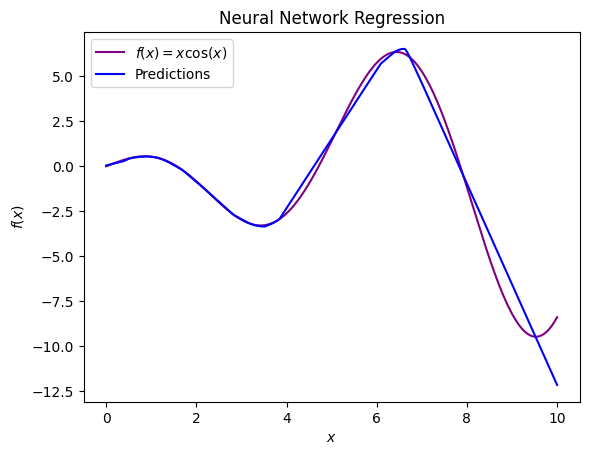

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generate x-axis values from 0 to 10 with 99999 points and reshape it to a column vector
axis = np.linspace(start=0, stop=10, num=500).reshape(-1, 1)

# Generate corresponding y-axis values using the function f(x) = x * cos(x)
ordinate = np.squeeze(axis * np.cos(axis))

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the generated data
model.fit(axis, ordinate, epochs=100, verbose=0)  # You can adjust the number of epochs

# Make predictions using the trained model
predictions = model.predict(axis)

# Plot the original function and predictions
plt.plot(axis, ordinate, label=r"$f(x) = x\cos(x)$", linestyle="solid", color="purple")
plt.plot(axis, predictions, label="Predictions", color="blue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Neural Network Regression")
plt.show()

16/16 [==============================] - 0s 392us/step


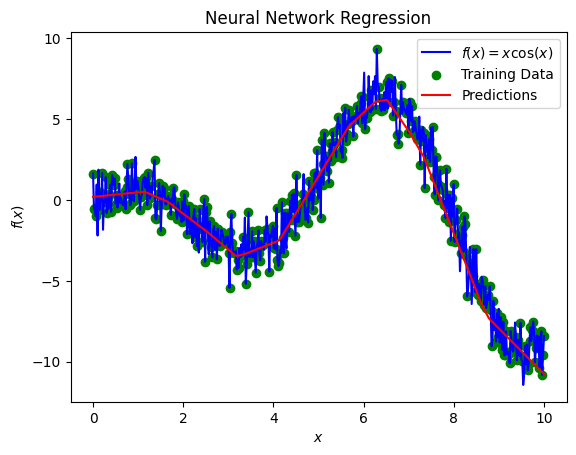

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Define the original function f(x) = x * cos(x)
def original_function(x):
    return x * np.cos(x)

# Generate synthetic data
np.random.seed(1)
axis = np.linspace(0, 10, 500)  # X values
ordinate = original_function(axis) + np.random.randn(500)  # Y values with some noise

# Split data into training and testing sets
trainAxis, testAxis, trainOrdinate, testOrdinate = train_test_split(axis, ordinate, test_size=0.2, random_state=1)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(trainAxis, trainOrdinate, epochs=500, verbose=0)  

# Make predictions using the trained model
predictions = model.predict(axis)

# Plot the original function, training data, and predictions
plt.plot(axis, ordinate, label=r"$f(x) = x\cos(x)$", linestyle="solid", color="blue")
plt.scatter(trainAxis, trainOrdinate, label="Training Data", color="green")
plt.plot(axis, predictions, label="Predictions", color="red")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Neural Network Regression")
plt.show()


Epoch [100/1000], Loss: 0.0853
Epoch [200/1000], Loss: 0.0829
Epoch [300/1000], Loss: 0.0817
Epoch [400/1000], Loss: 0.0810
Epoch [500/1000], Loss: 0.0806
Epoch [600/1000], Loss: 0.0803
Epoch [700/1000], Loss: 0.0800
Epoch [800/1000], Loss: 0.0797
Epoch [900/1000], Loss: 0.0794
Epoch [1000/1000], Loss: 0.0792


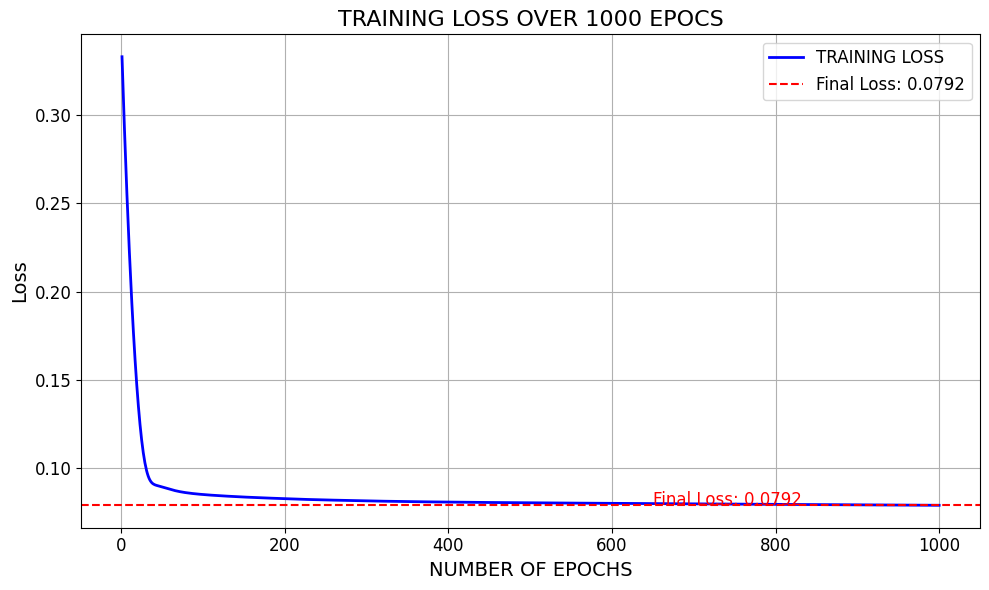

{'c1': 0.46589499711990356, 'c2': 0.4975516200065613, 'c3': 0.5160481333732605, 'c4': 0.44175511598587036, 'c5': 0.5564757585525513, 'c6': 0.43575549125671387, 'c7': 0.42500123381614685}


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

paramConfig = {
    'c1': {'hardening1'}, 
    'c2': {'hardening2'}, 
    'c3': {'hardening3'}, 
    'c4': {'hardening4'}, 
    'c5': {'hardening5'}, 
    'c6': {'hardening6'}, 
    'c7': {'hardening7'}
}

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define the number of input features, hidden units, and output dimensions
input_size = len(paramConfig)  # Number of input parameters
hidden_size = 64  # Number of hidden units (you can adjust this)
output_size = input_size  # Number of output dimensions (same as input for this case)

# Create an instance of the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Define a loss function (mean squared error) and an optimizer (e.g., Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust the learning rate as needed

# Generate random data (replace this with your actual data)
num_samples = 1000
X_train = torch.rand((num_samples, input_size))  # Random input data
Y_train = torch.rand((num_samples, output_size))  # Random output data

# Lists to store the loss values for visualization
losses = []

# Training loop
num_epochs = 1000  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Compute the loss
    loss = criterion(outputs, Y_train)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Append the loss to the list for visualization
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Create a fancier plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, label='TRAINING LOSS', linewidth=2, color='blue')
plt.xlabel('NUMBER OF EPOCHS', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('TRAINING LOSS OVER 1000 EPOCS', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()

# Add a horizontal line indicating the final loss
final_loss = losses[-1]
plt.axhline(final_loss, color='red', linestyle='--', label=f'Final Loss: {final_loss:.4f}')
plt.legend(fontsize=12)

# Add annotations for final loss
plt.annotate(f'Final Loss: {final_loss:.4f}', xy=(0.65 * num_epochs, final_loss), fontsize=12, color='red')

# Show the plot
plt.show()

# Evaluate the model and get predictions
X_test = torch.rand((1, input_size))  # Replace this with your actual input data
with torch.no_grad():
    predictions = model(X_test)

# Convert predictions to a dictionary
next_param_dict = {param: value.item() for param, value in zip(paramConfig.keys(), predictions[0])}

print(next_param_dict)